<!-- hide -->
# Random forest - Step by step guide
<!-- endhide -->
## 📝 Instructions

### Predicting diabetes

In the previous project we saw how we could use a decision tree to predict data sets related to classification and regression. However, did you know that we can improve the prediction of a tree by using a random forest?

As we have studied, a random forest is a grouping of trees generated with random portions of the data and with random criteria. This view would allow us to improve the effectiveness of the model when an individual tree is not sufficient.

In this project you will focus on this idea by training the dataset to improve the $accuracy$.

Remember that the previous project can be found [here](https://github.com/4GeeksAcademy/decision-tree-project-tutorial).

### Step 1: Loading the dataset

Load the processed dataset from the previous project (split into training and test samples and analyzed with EDA).

### Step 2: Build a random forest

One way to optimize and improve the results when using decision trees is to generate a random forest with enough trees so that there is the necessary variety to enrich the prediction. Train it and analyze its results. Try modifying the two hyperparameters that define the tree with different values and analyze their impact on the final accuracy and plot the conclusions.

### Step 3: Save the model

Store the model in the corresponding folder.

> NOTE: Solution: https://github.com/4GeeksAcademy/random-forest-project-tutorial/blob/main/solution.ipynb

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from joblib import dump


In [3]:
import joblib

# Load the data
X_train, X_test, y_train, y_test = joblib.load('/workspaces/machine-learning-python-template-ds-2023/Rashid/Random_Forest-Predicting Diabetes/data/processed/train_test_split_data.joblib')

In [4]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state = 42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
y_pred_in = model1.predict(X_train)
y_pred = model1.predict(X_test)
print(accuracy_score(y_train, y_pred_in))
print(accuracy_score(y_test, y_pred))

1.0
0.7337662337662337


In [6]:
grid_param = {
    "n_estimators": [100, 200],
    'max_features': [3,5],
    'min_samples_split': [2,5],
    'max_depth': [3,5]
}

In [7]:
rf_model = RandomForestClassifier(random_state = 12345)

In [8]:
gd_cv = GridSearchCV(estimator=rf_model, param_grid=grid_param, cv=5, n_jobs=-1, verbose=2)

In [9]:
gd_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.4s


[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=3, max_features=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=3, max_features=3, mi

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [10]:
gd_cv.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [11]:
best_gd_rf_model = gd_cv.best_estimator_

In [12]:
y_pred_in = best_gd_rf_model.predict(X_train)
y_pred = best_gd_rf_model.predict(X_test)
print(accuracy_score(y_train, y_pred_in))
print(accuracy_score(y_test, y_pred))

0.8680781758957655
0.7532467532467533


In [13]:
from sklearn.model_selection import RandomizedSearchCV

random_param = {
    "n_estimators": [100, 200, 500, 1000],
    'max_features': [3, 5, 7],
    'min_samples_split': [2, 5, 10, 30],
    'max_depth': [3, 5, 8, None]
}

rs_rf_model = RandomForestClassifier(random_state=12345)
random_cv = RandomizedSearchCV(estimator=rs_rf_model, param_distributions=random_param, n_iter=50, cv=5, n_jobs=-1, verbose=2)
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, max_features=7, min_samples_split=30, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=7, min_samples_split=30, n_estimators=200; total time=   0.6s


[CV] END max_depth=None, max_features=7, min_samples_split=30, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=7, min_samples_split=30, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=7, min_samples_split=30, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=3, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=3, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=3, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=3, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=3, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END max_depth=8, max_features=7, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END max_depth=8, max_features=7, min_samples_split=10, n_estimators=1000; total time=   3.3s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8, None],
                                        'max_features': [3, 5, 7],
                                        'min_samples_split': [2, 5, 10, 30],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [14]:
best_model = random_cv.best_estimator_

In [15]:
best_params = random_cv.best_params_

In [16]:
y_pred_in = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
print(accuracy_score(y_train, y_pred_in))
print(accuracy_score(y_test, y_pred))

0.993485342019544
0.7532467532467533


In [17]:
print(f"mean squared error-in: {mean_squared_error(y_train, y_pred_in)}")
print(f"mean squared error-out: {mean_squared_error(y_test, y_pred)}")

mean squared error-in: 0.006514657980456026
mean squared error-out: 0.24675324675324675


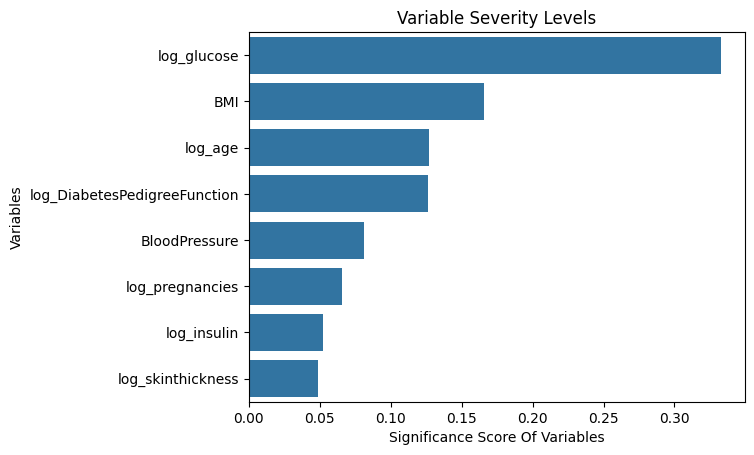

In [19]:
feature_imp = pd.Series(best_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [22]:
dump(best_gd_rf_model, open("best_gd_rf_model.sav", "wb"))